### Importando bibliotecas

In [1]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio pingouin numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando os dados

In [2]:
# Carregar o arquivo
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Checar o arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Remover coluna id pois na predição ela não será útil
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# Remover espaço no nome das colunas
# removendo nome maiusculo das colunas
# Renomear as colunas
df_colesterol.columns=[
  'grupo_sanguineo',
  'fumante',
  'nivel_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'nivel_colesterol'
]

# nivel_colesterol será nosso target (variavel dependente)

In [6]:
df_colesterol.head(5)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [7]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [8]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### Realizando EDA

In [9]:
# Lidando com valores numéricos
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [10]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [11]:
# Detectar Valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [12]:
# vericar as  Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [13]:
# Coletar medidas das variaveis categoricas pela moda
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [14]:
# Coletar medidas das variaveis numericas pela mediana
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [15]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso':mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [16]:
# Visualizar os dados após substituição de valores ausentes
# Detectar Valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [17]:
# Converter o tipo das variaveis idade e altura de float para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [18]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [19]:
# visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

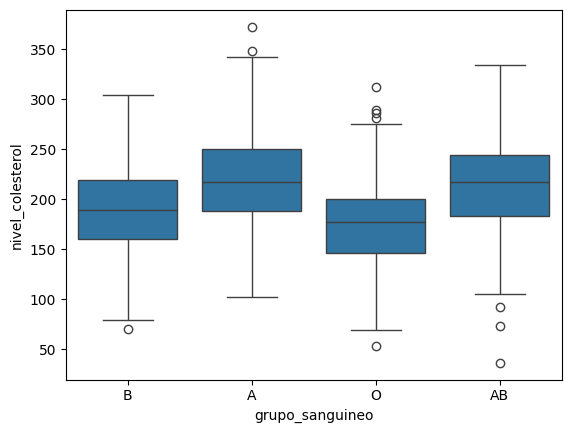

In [20]:
# Verificar / detectar outliers
sns.boxplot(x='grupo_sanguineo', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso'>

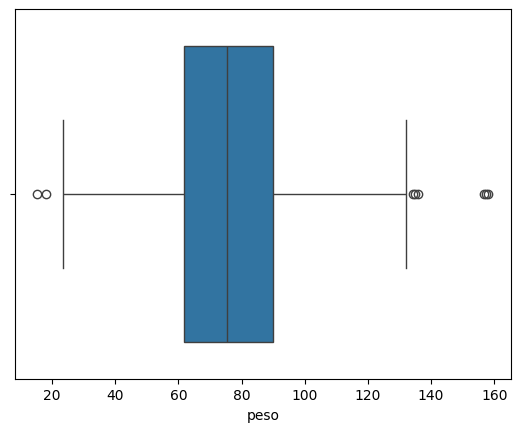

In [21]:
# Verificar / detectar outliers
sns.boxplot(x='peso', data=df_colesterol_eda)

In [22]:
# Considerando o outlier de pessoas com peso extremamente baixo
# Como o publico está entre 20 e 79 anos, podemos considerar um erro de input

#Vamos filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [23]:
# Remover publico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40]
                       .index, axis=0, inplace=True)

In [24]:
# Verificando novamente a estrutura após o drop das linhas
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


<Axes: xlabel='peso'>

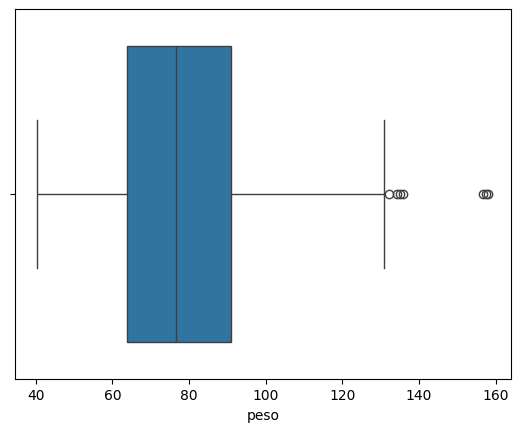

In [25]:
# Verificar se o outlier da parte inferior foi removida
sns.boxplot(x='peso', data=df_colesterol_eda)

<Axes: xlabel='altura'>

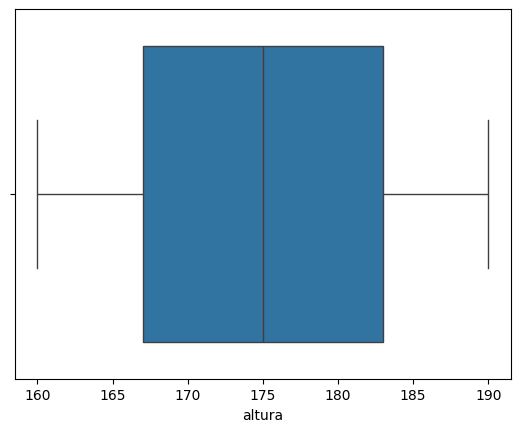

In [26]:
# Verificar / detectar outliers - Altura
sns.boxplot(x='altura', data=df_colesterol_eda)

<Axes: xlabel='nivel_colesterol'>

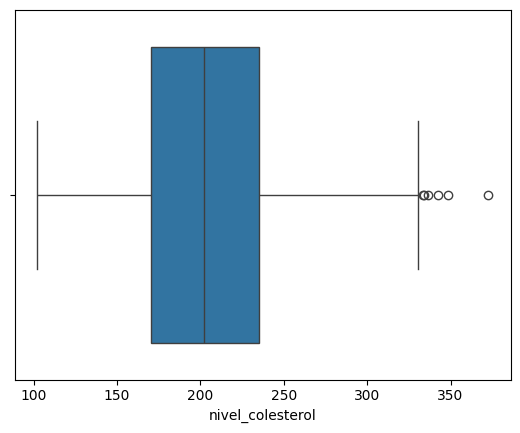

In [27]:
# Verificar / detectar outliers
sns.boxplot(x='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

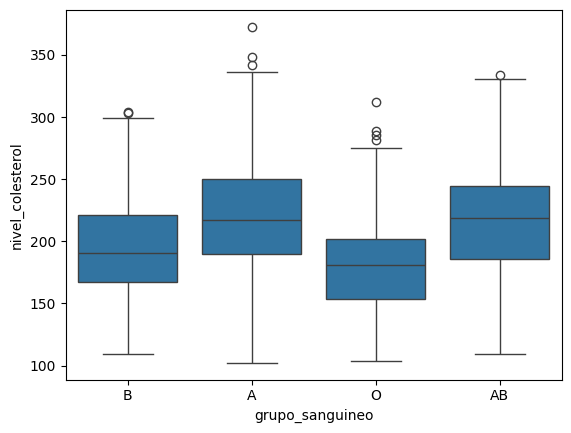

In [28]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='grupo_sanguineo', y='nivel_colesterol' )

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

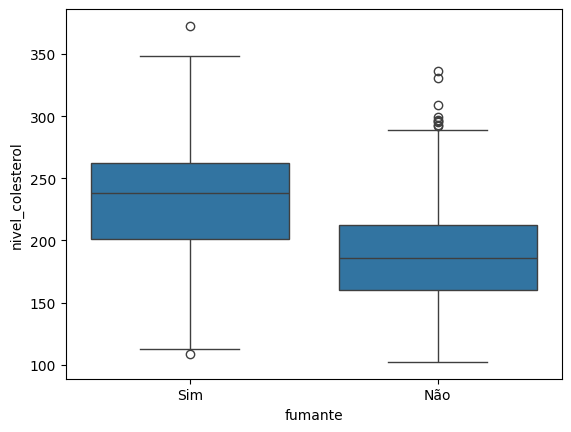

In [29]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='fumante', y='nivel_colesterol' )

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

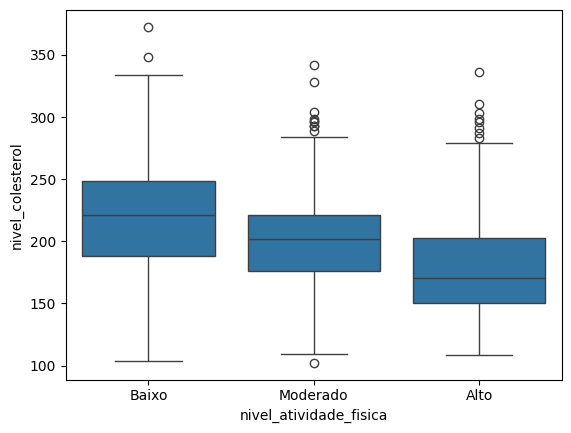

In [30]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='nivel_atividade_fisica', y='nivel_colesterol' )

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

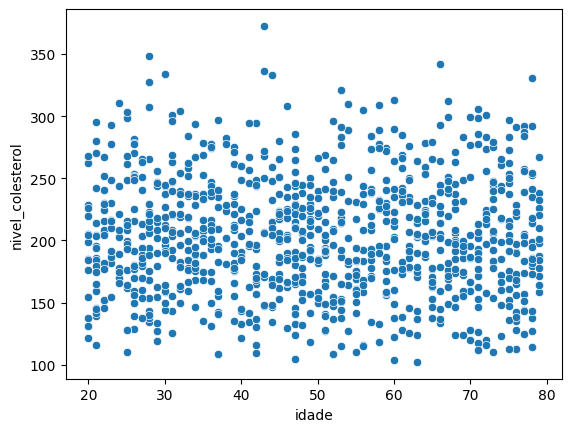

In [31]:
# Cruzamento de variaveis numéricas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

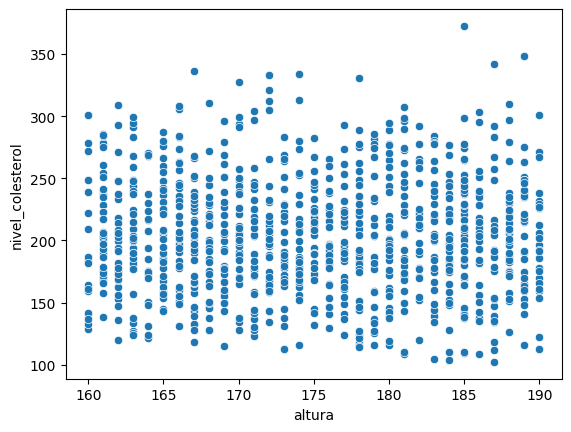

In [32]:
# Cruzamento de variaveis numéricas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

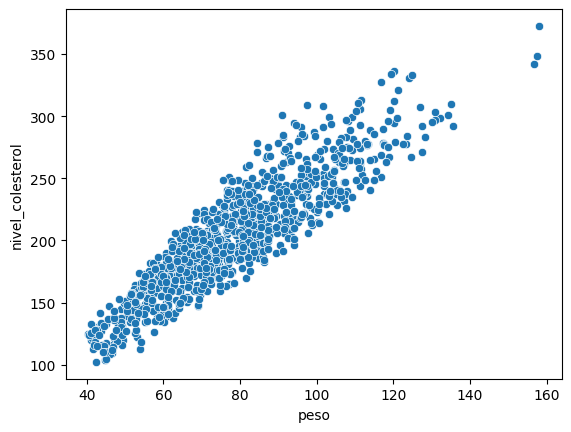

In [33]:
# Cruzamento de variaveis numéricas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

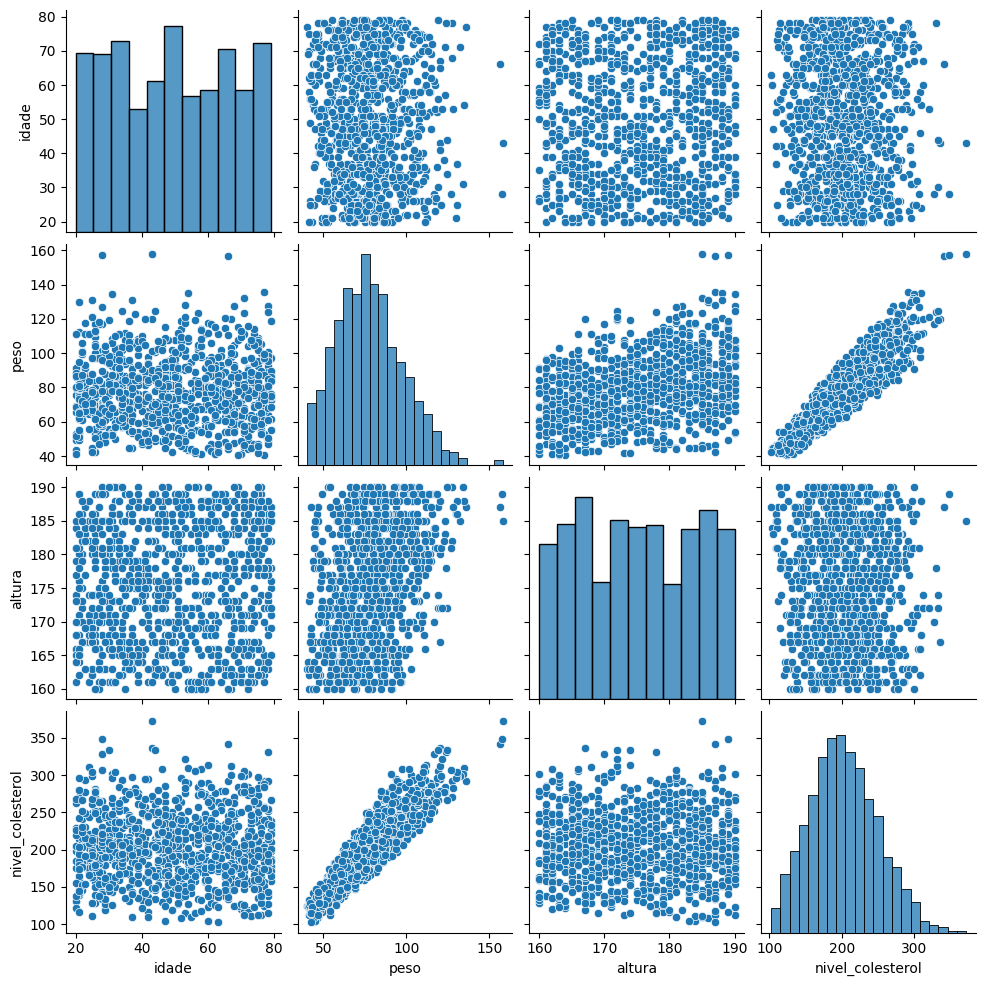

In [34]:
# Análise dos gráficos com Histograma
sns.pairplot(df_colesterol_eda)

In [35]:
# Converter variaveis categoricas em numericas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [36]:
# Verificar estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nivel_atividade_fisica  963 non-null    object 
 1   idade                   963 non-null    int64  
 2   peso                    963 non-null    float64
 3   altura                  963 non-null    int64  
 4   nivel_colesterol        963 non-null    float64
 5   grupo_sanguineo_A       963 non-null    int64  
 6   grupo_sanguineo_AB      963 non-null    int64  
 7   grupo_sanguineo_B       963 non-null    int64  
 8   grupo_sanguineo_O       963 non-null    int64  
 9   fumante_Não             963 non-null    int64  
 10  fumante_Sim             963 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 90.3+ KB


In [37]:
# Converter variavel categorica ordinam em numerica usando factorize do pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

<Axes: >

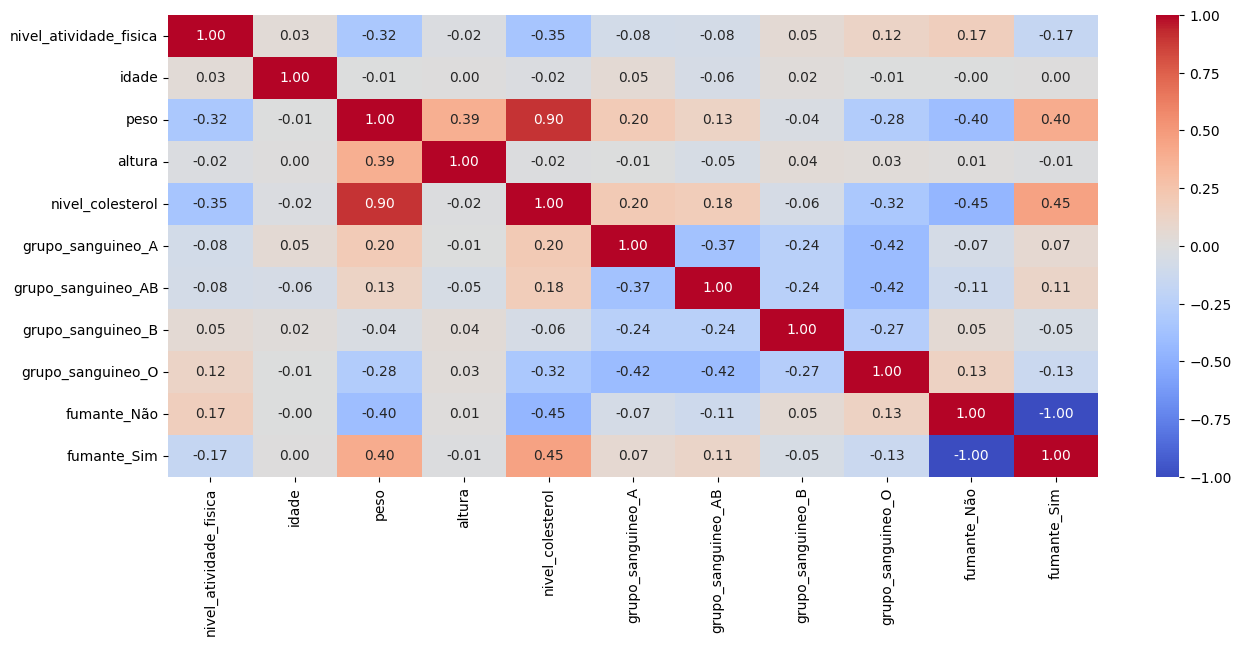

In [38]:
# Mapa de calor com correlação entre as variaveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), annot=True,vmin=-1,vmax=1, fmt='.2f', cmap='coolwarm')

<Axes: >

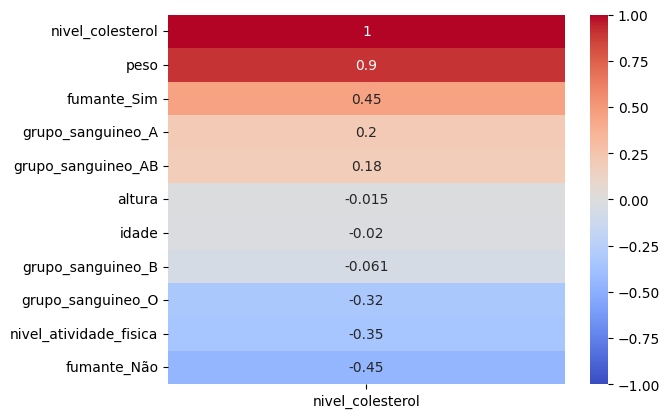

In [39]:
# formato de ranking, somente correlação com a variável target (nivel_colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol',
                                                           ascending=False),
                                                           annot=True,
                                                           vmin=-1,
                                                           vmax=1,
                                                           cmap='coolwarm')

In [40]:
# Bucketing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], 
                                          bins=bins_idade, labels=labels_idade,
                                          include_lowest=True)

In [41]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

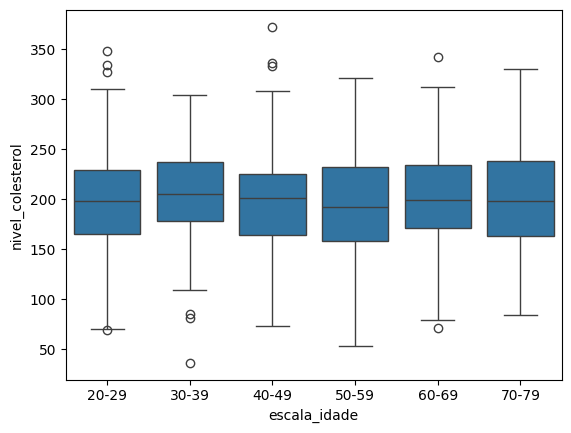

In [42]:
sns.boxplot(data=df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [43]:
# Bucketing Peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], 
                                          bins=bins_peso, labels=labels_peso,
                                          include_lowest=True)

In [44]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade,escala_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

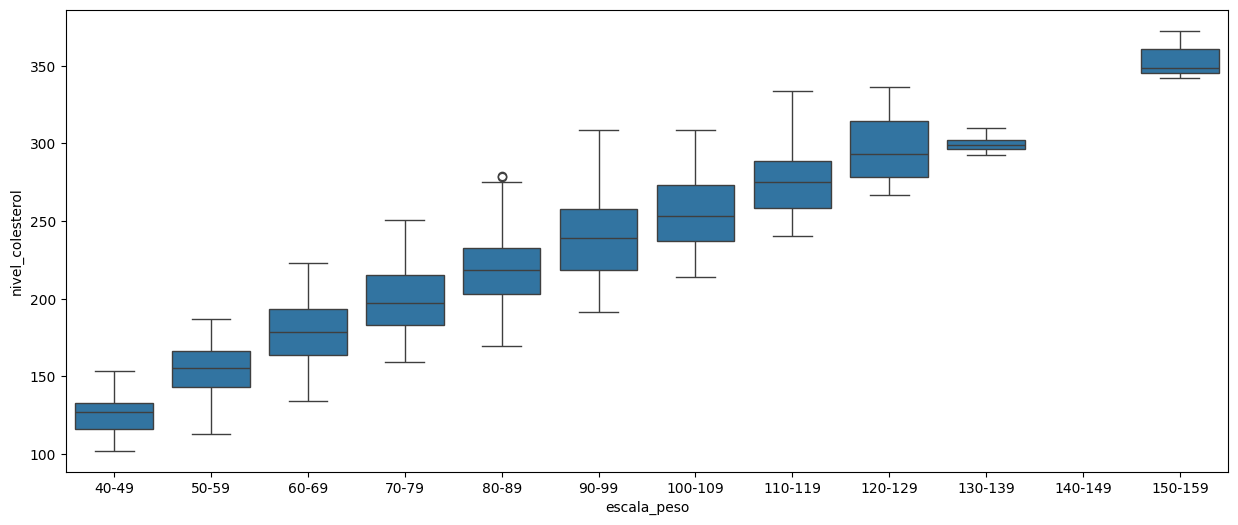

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

### Preparação do Dataset para Treinamento

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [47]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [48]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


### Treinamento do modelo

In [49]:
X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']

In [50]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((674, 6), (289, 6), (674,), (289,))

In [52]:
# Pipeline
# Imputar moda nas variaveis categoricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# padronizar as variaveis numericas - idade, peso, altura
# aplicar OneHotEncoder nas variaveis categoricas nominais - grupo_sanguineo, fumante
# aplicar OneHotEncoder nas variaveis categoricas ordinais - nivel_atividade_fisica
# imputar mediana nos valores ausentes nas variaveis numericas - idade, peso, altura

# Pipeline
# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'peso', 'altura']
colunas_categoricas_ordinais = ['nivel_atividade_fisica']

In [53]:
# Criar um pipeline de transformação para cada uma das categorias
# Transformer Categoricas
transformer_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [54]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']],
                                handle_unknown='error'))
])

In [55]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [56]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categoricas, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_categoricas_ordinais)
    ])

### Treinando o modelo com pipeline

In [57]:
# Criando o Pipeline principal = preprocessor + treinamento do modelo
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())
                              ])

In [58]:
# Treinar Modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

### Análise de métricas

In [59]:
# Gerar predição
y_pred = model_regr.predict(X_test)

In [60]:
# Calcular o R2
r2 = r2_score(y_test, y_pred)
r2

0.9594250724093465

In [61]:
# Calcular o MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae

7.313838031022501

In [62]:
## Com base no MAE, concluimos que o modelo errou 7 pontos pra mais ou pra menos
## em relação ao nivel de colesterol
## Relativamente baixo, considerando que o nivel de colesterol varia de 0 a 200


In [63]:
# RMSE - Root Mean Squared Error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(9.097649246487032)

### Analise de Residuos

In [64]:
# calcular os residuos
residuos = y_test - y_pred

In [65]:
# Transformar residuos na escala padrão
# (X - X.mean()) / X.std()
from scipy.stats import zscore
residuos_std = zscore(residuos)

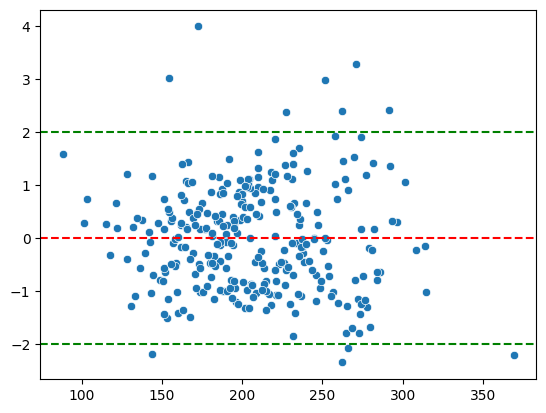

In [66]:
# Verificar linearidade dos residuos:
# Se valores estão entre -2 e +2
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')

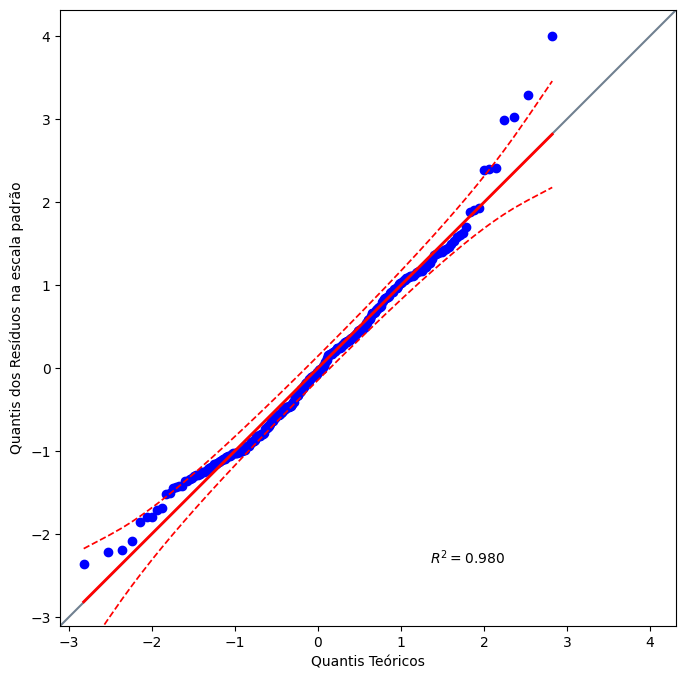

In [67]:
# Verificar normalidade dos residuos
## QQ Plot
import pingouin as pg
plt.figure(figsize=(15,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos na escala padrão')
plt.show()

In [68]:
# Teste de Normalidade 
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [69]:
# Teste de Normalidade Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-value: {}".format(stat_shapiro, p_value_shapiro))

Estatistica do Teste: 0.980773772972073 e P-value: 0.0006268860444489885


In [70]:
# Teste de kolmogorov-smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica do Teste: {} e P-value: {}".format(stat_ks, p_value_ks))

Estatistica do Teste: 0.4245592099848544 e P-value: 8.925833190918416e-48


In [73]:
# Teste de lilliefors
stat_lillie, p_value_lillie = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica do Teste: {} e P-value: {}".format(stat_lillie, p_value_lillie))

Estatistica do Teste: 0.049553710301928344 e P-value: 0.12533323720737566


In [75]:
# Teste de Anderson-Darling
stat_and,critical_and, significance_and = anderson(residuos, dist='norm')


In [76]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [77]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [78]:
print("Estatistica do Teste: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatistica do Teste: 0.9169275158490677 e Valor Crítico: 0.776


In [82]:
# Teste de Homocedasticidade de Golgfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [83]:
X_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [84]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do Teste: {} e P-value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatistica do Teste: 0.6716135765253546 e P-value: 0.9893959472385483
